# NeurotechX Montreal MNI/Deeplearning Workshop

## Utilities

In [59]:
%matplotlib inline
from shutil import unpack_archive
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
from sys import argv, exit
from os.path import  exists
from os import makedirs
import argparse
#local modules defined in current project
from make_and_run_model import *
from predict import *
from prepare_data import *
from utils import *
from custom_loss import *
from plot_metrics import *
from minc_keras import *


## Clone repo

In [0]:
# Clone repo
!git clone --recursive https://www.github.com/tfunck/minc_keras

rm: cannot remove 'minc_keras': No such file or directory
Cloning into 'minc_keras'...
remote: Counting objects: 373, done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 373 (delta 53), reused 51 (delta 20), pack-reused 273
Receiving objects: 100% (373/373), 61.96 MiB | 17.83 MiB/s, done.
Resolving deltas: 100% (183/183), done.


In [60]:
# Set data directory for extract
current_dir = os.getcwd()
data_dir = os.path.join(current_dir, 'data')

# Extract data
unpack_archive('data\\output.tar.bz2', data_dir)

## Train and test with model_0_0

In [61]:
# Train and test with model_0_0
source_dir = os.path.join(current_dir, 'data/output/')
target_dir = current_dir
nb_epoch = 2
model_type = "model_0_0"
input_str = "*T1w_anat*"
label_str = "*seg*"
images_to_predict = '1,4'
ratios =  [0.3,0.3]
clobber = True
batch_size = 1
feature_dim = 2
model_fn = 'model.hdf5'
images_fn = 'images.csv'
verbose = 1

In [63]:
# Call main function
minc_keras(source_dir, target_dir, input_str, label_str, ratios, feature_dim=2, 
           batch_size=2, nb_epoch=nb_epoch, images_to_predict=images_to_predict, 
           clobber=clobber, model_fn=model_fn,model_type=model_type, images_fn=images_fn, verbose=verbose)

268 0.3
train : expected/real ratio = 30.00 / 29.85
268 0.3
validate : expected/real ratio = 30.00 / 29.85


C:\Users\frede\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Saving train images: 70 / 80
Saving validate images: 70 / 80
Saving validate images: 70 / 80
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 110, 92, 1)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 110, 92, 16)       160       
_________________________________________________________________
dropout_25 (Dropout)         (None, 110, 92, 16)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 110, 92, 16)       2320      
_________________________________________________________________
dropout_26 (Dropout)         (None, 110, 92, 16)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 110, 92, 32)       4640      
_________________________________________________

0

## Show MRI segmentation results

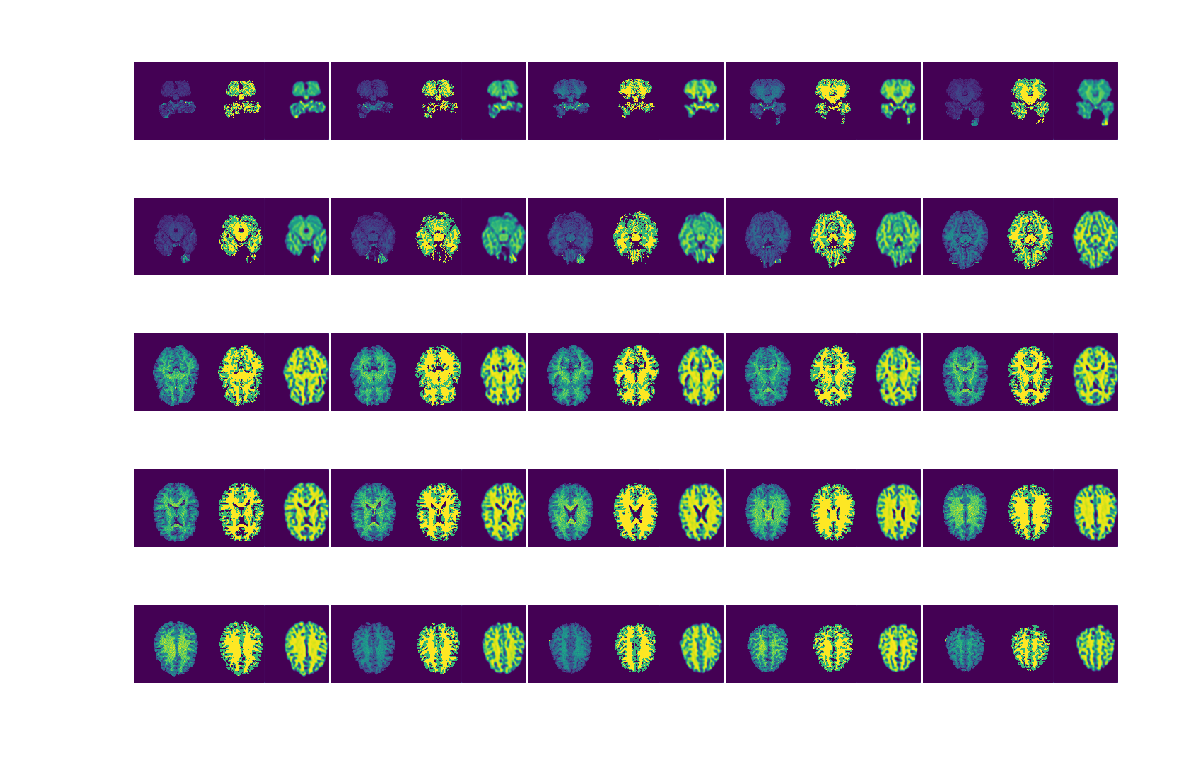

In [64]:
for fn in glob('predict/*/*.png'):
    img = mpimg.imread(fn)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.axis('off')
plt.show()

## Show training plots

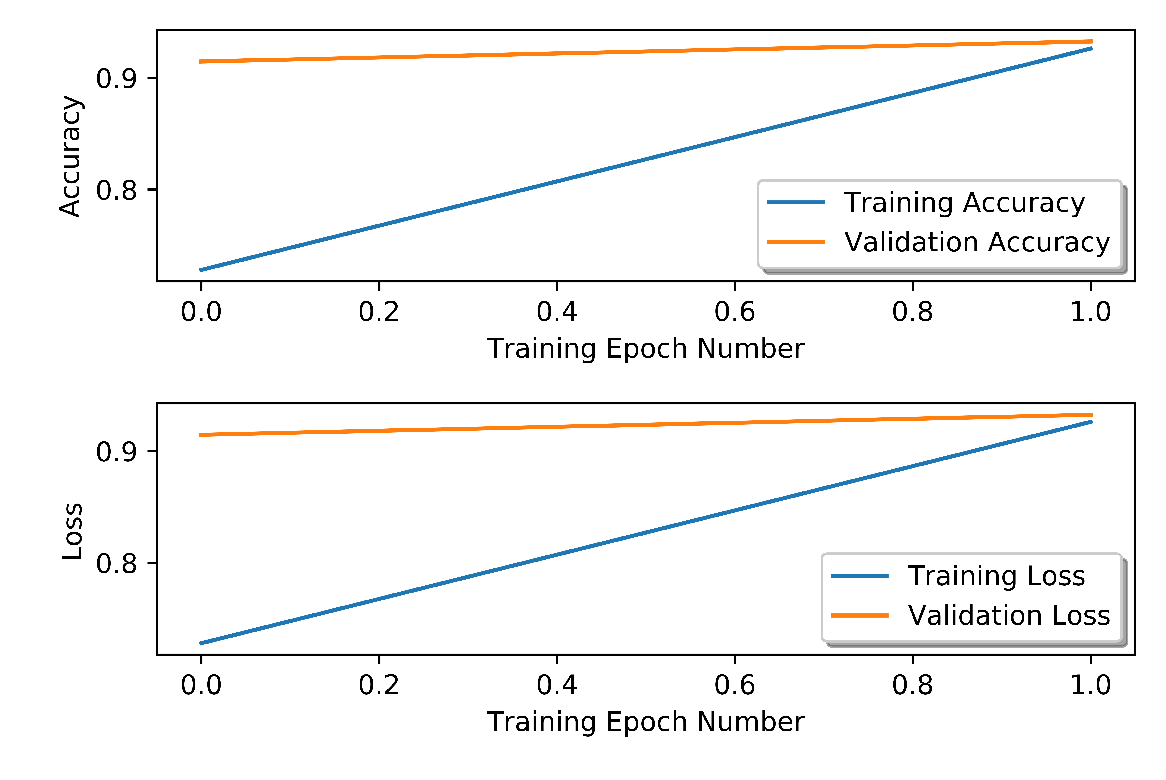

In [65]:
plt.figure(figsize=(20,20))
plt.imshow(plt.imread('report/model_training_plot.png'))
plt.axis('off')
plt.show()